# Mixed Precision Pytorch

#### reference:
https://youtu.be/9tpLJpqxdE8

In [2]:
import torch
import numpy as np
import time
from IPython import display

In [2]:
N = 64_000
D_in   = 10240
D_out  = 5120
epochs = 100

# FP32

In [3]:
x = torch.rand(N, D_in).cuda()
y = torch.rand(N, D_out).cuda()
model = torch.nn.Linear(D_in, D_out).cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [4]:
st = time.time()

for t in np.arange(epochs):
    y_pred = model(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


ed = time.time()
print(f'time: {np.round((ed-st),2)} sec')

# 10.19 G, 8.2 sec

time: 8.27 sec


# FP16

### First way

In [5]:
# wrong way1
x = torch.rand(N, D_in).cuda()
y = torch.rand(N, D_out).cuda()
model = torch.nn.Linear(D_in, D_out).cuda()

x = x.half()         # <--
y = y.half()         # <--
model = model.half() # <--

# 6.12 G, 5.41 sec

In [6]:
# wrong way2
x = torch.rand(N, D_in).cuda().half()              # <--
y = torch.rand(N, D_out).cuda().half()             # <--
model = torch.nn.Linear(D_in, D_out).cuda().half() # <--

# 5.92 G, 5.37 sec

### better way

In [7]:
# Correct way
x = torch.rand(N, D_in).half().cuda()              # <--
y = torch.rand(N, D_out).half().cuda()             # <--
model = torch.nn.Linear(D_in, D_out).half().cuda() # <--

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [8]:
st = time.time()

for t in np.arange(epochs):
    y_pred = model(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


ed = time.time()
print(f'time: {np.round((ed-st),2)} sec')

# 5.73 G, 5.28 sec

time: 5.43 sec


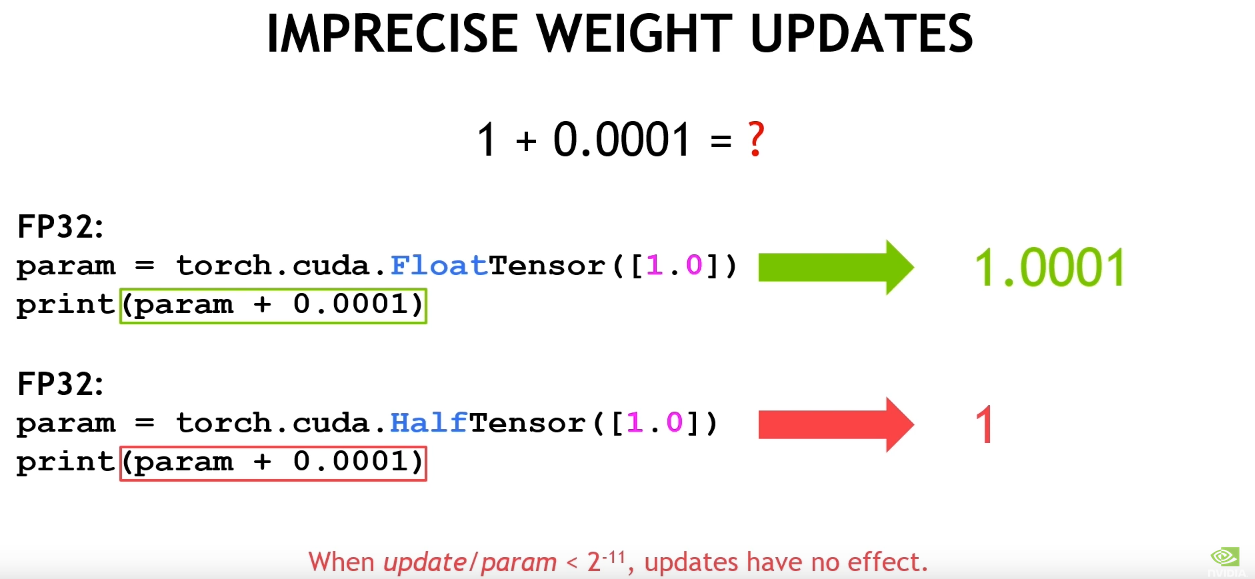

In [2]:
display.Image("png/problem1.png", retina=True)

In [10]:
# float16
a = torch.tensor([1.0]).half().cuda()
b = torch.tensor([0.0001]).half().cuda()
print(f'{a=},\n{b=},\n{a+b=}')

a=tensor([1.], device='cuda:0', dtype=torch.float16),
b=tensor([0.0001], device='cuda:0', dtype=torch.float16),
a+b=tensor([1.], device='cuda:0', dtype=torch.float16)


In [11]:
# bfloat16
a = torch.tensor([1.0]).bfloat16().cuda()
b = torch.tensor([0.0001]).bfloat16().cuda()
print(f'{a=},\n{b=},\n{a+b=}')

a=tensor([1.], device='cuda:0', dtype=torch.bfloat16),
b=tensor([0.0001], device='cuda:0', dtype=torch.bfloat16),
a+b=tensor([1.], device='cuda:0', dtype=torch.bfloat16)


In [36]:
# float16 V.S. bfloat16
a = torch.tensor([1.0001]).cuda()
b = torch.tensor([1.001]).cuda()
c = torch.tensor([1.01]).cuda()
d = torch.tensor([1.1]).cuda()

print(f'{a=},\n{b=}')
print(f'{a.half()=},\n{a.bfloat16()=}')
print(f'{b.half()=},\n{b.bfloat16()=}')
print(f'{c.half()=},\n{c.bfloat16()=}')
print(f'{d.half()=},\n{d.bfloat16()=}')

a=tensor([1.0001], device='cuda:0'),
b=tensor([1.0010], device='cuda:0')
a.half()=tensor([1.], device='cuda:0', dtype=torch.float16),
a.bfloat16()=tensor([1.], device='cuda:0', dtype=torch.bfloat16)
b.half()=tensor([1.0010], device='cuda:0', dtype=torch.float16),
b.bfloat16()=tensor([1.], device='cuda:0', dtype=torch.bfloat16)
c.half()=tensor([1.0098], device='cuda:0', dtype=torch.float16),
c.bfloat16()=tensor([1.0078], device='cuda:0', dtype=torch.bfloat16)
d.half()=tensor([1.0996], device='cuda:0', dtype=torch.float16),
d.bfloat16()=tensor([1.1016], device='cuda:0', dtype=torch.bfloat16)


In [37]:
1.0996-1.1, 1.1016-1.1

(-0.000400000000000178, 0.0015999999999998238)

In [26]:
# float32 --> float16,  0.0001
a = torch.tensor([1.0]).float().cuda()
b = torch.tensor([0.0001]).float().cuda()
c_32 = a+b

c_16 = c_32.clone().detach().half()
c_b16 = c_32.clone().detach().bfloat16()
print(f'{a=},\n{b=},\n{c_32=},\n{c_16=},\n{c_b16=}')

a=tensor([1.], device='cuda:0'),
b=tensor([1.0000e-04], device='cuda:0'),
c_32=tensor([1.0001], device='cuda:0'),
c_16=tensor([1.], device='cuda:0', dtype=torch.float16),
c_b16=tensor([1.], device='cuda:0', dtype=torch.bfloat16)


In [27]:
# float32 --> float16,  0.001
a = torch.tensor([1.0]).float().cuda()
b = torch.tensor([0.0011]).float().cuda()
c = a+b

d = c.clone().detach().half()
e = c.clone().detach().bfloat16()
print(f'{a=},\n{b=},\n{c=},\n{d=},\n{e=}')

a=tensor([1.], device='cuda:0'),
b=tensor([0.0011], device='cuda:0'),
c=tensor([1.0011], device='cuda:0'),
d=tensor([1.0010], device='cuda:0', dtype=torch.float16),
e=tensor([1.], device='cuda:0', dtype=torch.bfloat16)


In [25]:
a = torch.tensor([1.]).half().cuda()
b = torch.tensor([0.0005]).half().cuda()
print(f'{a=},\n{b=},\n{a+b=}')

a=tensor([1.], device='cuda:0', dtype=torch.float16),
b=tensor([0.0005], device='cuda:0', dtype=torch.float16),
a+b=tensor([1.0010], device='cuda:0', dtype=torch.float16)


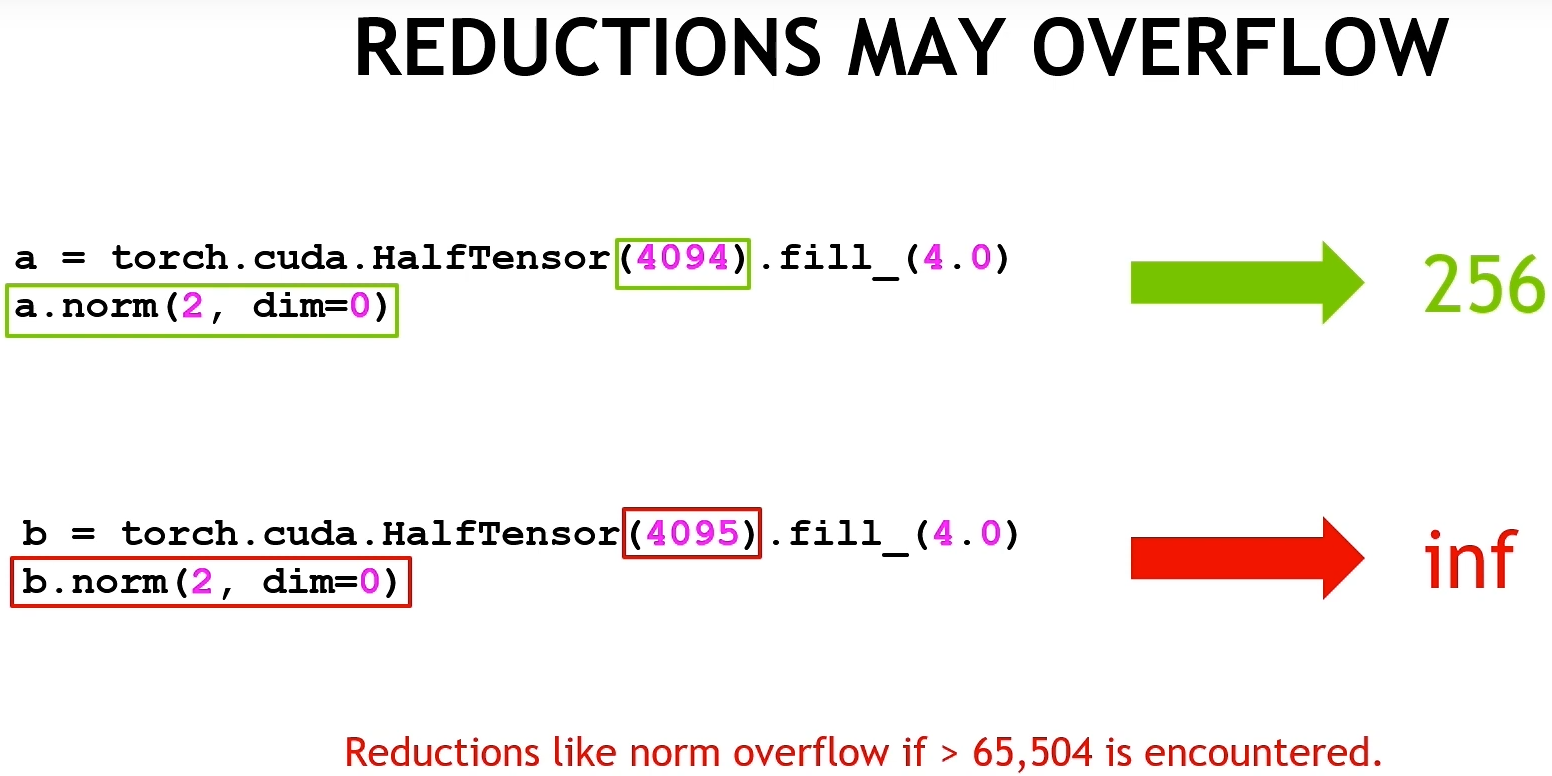

In [3]:
display.Image("png/problem2.png", retina=True)

In [13]:
a = torch.cuda.HalfTensor(4094).fill_(4.0).norm(2, dim=0)
b = torch.cuda.HalfTensor(4095).fill_(4.0).norm(2, dim=0)
c = torch.HalfTensor(4096).fill_(4.0).norm(2, dim=0)
d = torch.cuda.HalfTensor(4097).fill_(4.0).norm(2, dim=0)
print(f'{a=},\n{b=},\n{c=},\n{d=}')

a=tensor(255.8750, device='cuda:0', dtype=torch.float16),
b=tensor(256., device='cuda:0', dtype=torch.float16),
c=tensor(256., dtype=torch.float16),
d=tensor(256., device='cuda:0', dtype=torch.float16)


/tmp/ipykernel_26793/1372857641.py:1: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at /opt/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:82.)
  a = torch.cuda.HalfTensor(4094).fill_(4.0).norm(2, dim=0)


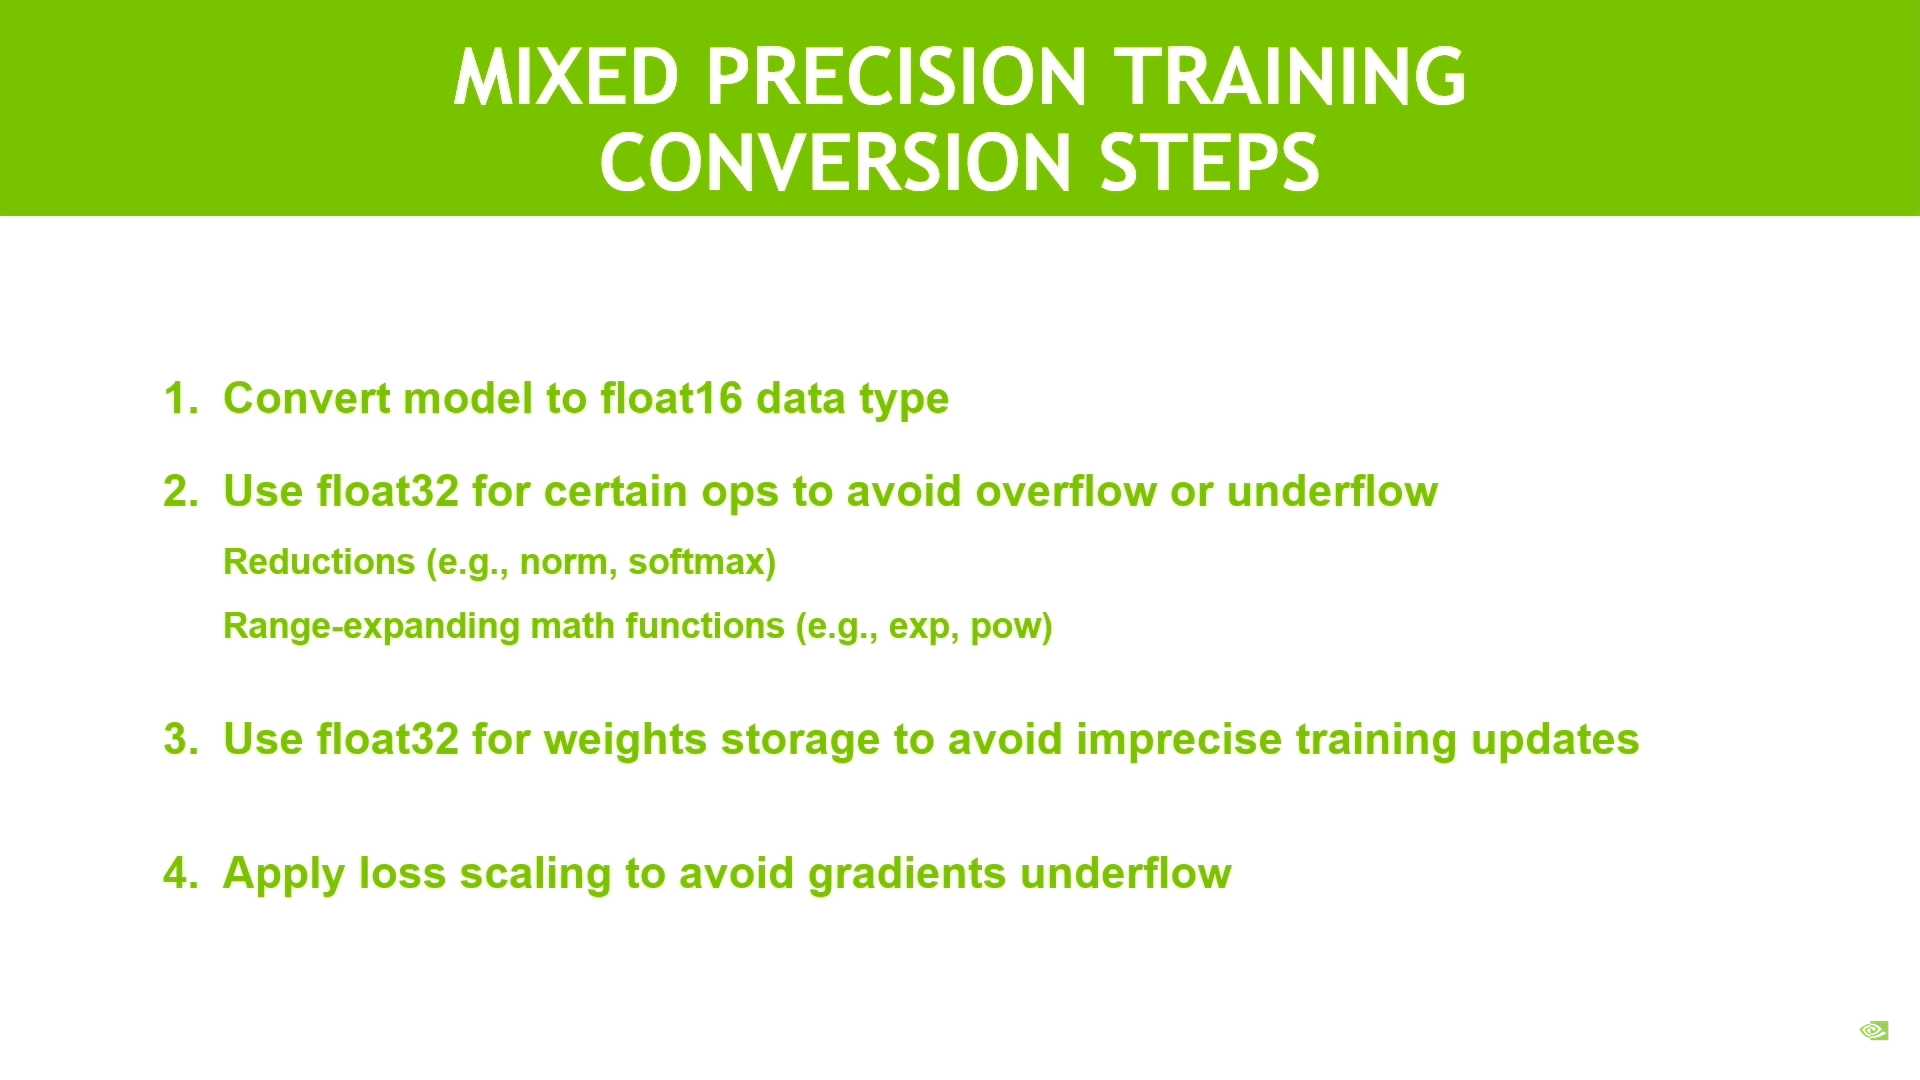

In [4]:
display.Image("png/problem3.png", retina=True)

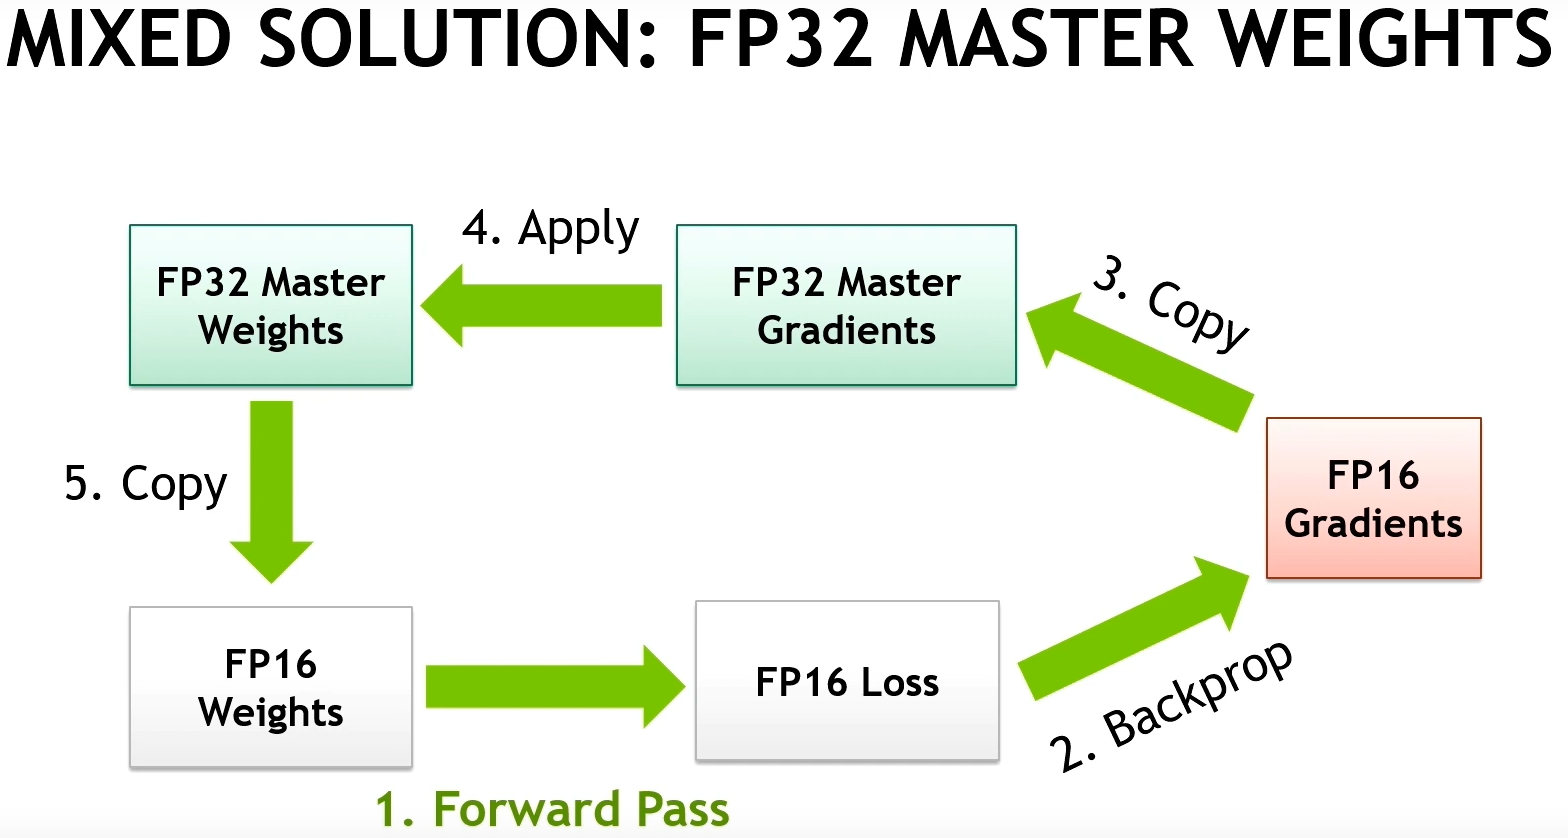

In [5]:
display.Image("png/1.png", retina=True)

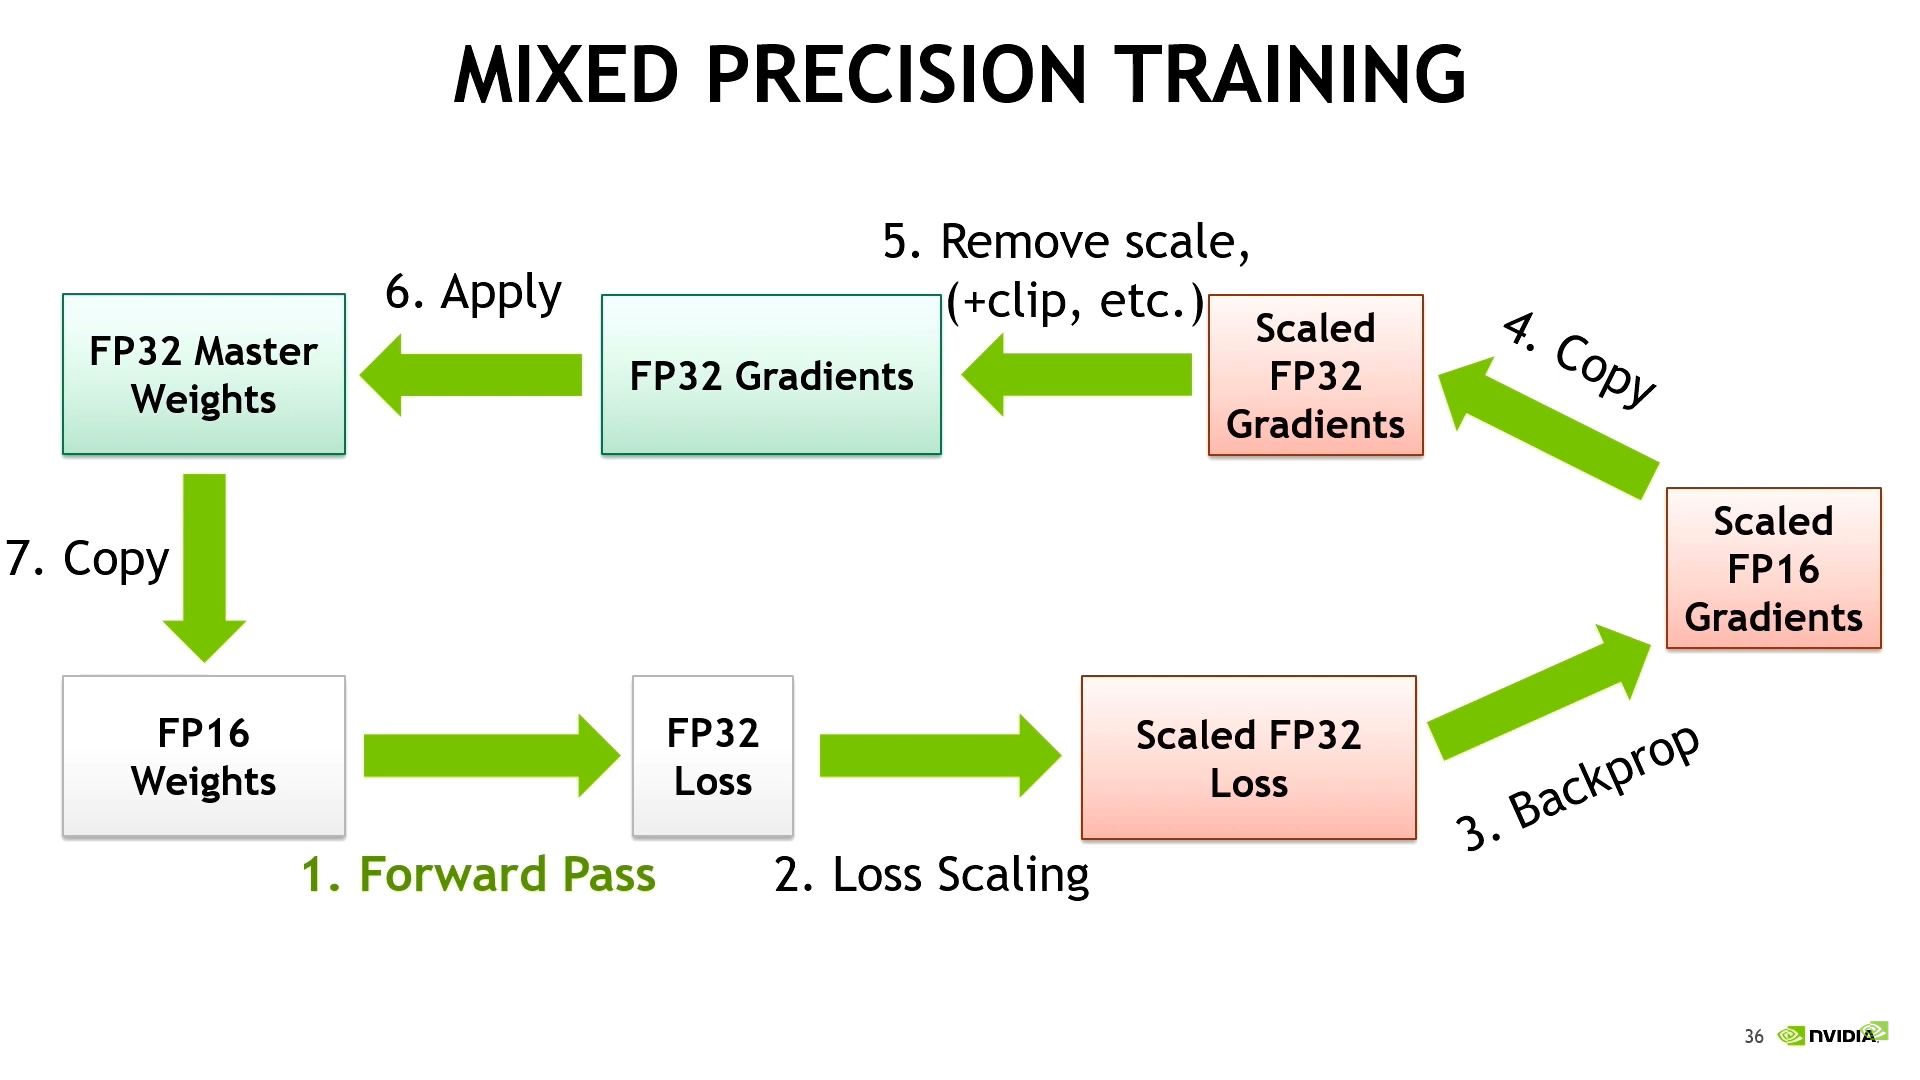

In [6]:
display.Image("png/2.png", retina=True)

# Mixed FP32 and FP16

In [17]:
# helper functions
def prep_param_lists(model):
    ''' Extract FP16 and FP32 of weights'''
    model_params  = [p for p in model.parameters() if p.requires_grad]
    # FP32 master weights
    master_params = [p.detach().clone().float() for p in model_params]
    for p in master_params:
        p.requires_grad = True
    return model_params, master_params # FP16, FP32

def master_params_to_model_params(model_params, master_params):
    ''' updated FP32 master weights-->copy--> back into FP16 weights'''
    for model, master in zip(model_params, master_params):
        model.data.copy_(master.data)

def model_grads_to_master_grads(model_params, master_params):
    ''' FP16 gradients -->copy--> FP32 master gradients'''
    for model, master in zip(model_params, master_params):
        if master.grad is None:
            master.grad = master.data.new(*master.data.size())
        master.grad.data.copy_(model.grad.data)
        
def BN_convert_float(module):
    ''' Convert all BN layers to FP32'''
    if isinstance(module, torch.nn.modules.batchnorm._BatchNorm):
        module.float()
    for child in module.children():
        BN_convert_float(child)
    return module

## Save master weights
## Save gradient scale factor

In [18]:
# Correct way
x = torch.rand(N, D_in).half().cuda()                # <-- half()
y = torch.rand(N, D_out).cuda()               
model = torch.nn.Linear(D_in, D_out).half()          # <-- half()

model = BN_convert_float(model).cuda()               # <-- BN to FP32

scale_factor = 128.0                                 # <-- loss scaling

# FP32 master weights
model_params, master_params = prep_param_lists(model) # <-- Helper func

optimizer = torch.optim.SGD(master_params, lr=1e-3)  # <-- master_params

In [19]:
st = time.time()

for t in np.arange(epochs):
    y_pred = model(x)
    
    # loss in FP32, model grads in FP16, Prevent overflow loss
    loss = torch.nn.functional.mse_loss(y_pred.float(), y)
    
    # scaling loss
    scaled_loss = scale_factor * loss
    
    model.zero_grad()
    scaled_loss.backward()            # <-- replace loss with scaled_loss
    
    # FP16 gradients --> FP32 master gradients
    model_grads_to_master_grads(model_params, master_params) # <-- Helper func
    
    # FP32 master gradients descaled
    for param in master_params:
        param.grad.data.mul_(1./scale_factor)

    optimizer.step()
    
    # FP32 updated --> FP16
    master_params_to_model_params(model_params, master_params) # <-- Helper func

ed = time.time()
print(f'time: {np.round((ed-st),2)} sec')

# 10.59 G, 12 sec

time: 12.25 sec
